## CPR Waveform Segmentation - PostDoc Application

**Project Goal:** Develop a machine learning model to accurately identify diastolic and systolic points within arterial waveforms obtained during both chest compressions and normal heartbeats.

**Background:** Analyzing these waveforms is crucial for monitoring CPR effectiveness. Standard peak detection methods can be unreliable during compressions, necessitating a more robust approach.

**Data:** This notebook utilizes a dataset of 6,800 labeled waveform segments.

Let's first load the data

In [1]:
import numpy as np

try:
    # Attempt to load the data
    data = np.load('data/sample_data.npy')

    # Print the shape of the loaded data to verify it's loaded correctly
    print("Data loaded successfully!")
    print("Shape of the loaded data:", data.shape)

    # You can now work with the 'data' variable. For example, print the first few elements:
    # print(data[:5])

except FileNotFoundError:
    print("Error: 'sample_data.npy' not found. Please make sure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

Data loaded successfully!
Shape of the loaded data: (2, 6800, 400)


In [2]:
input_data = data[0,:,:]
output_data = data[1,:,:].astype(int)
signal_freq = 200  # Hz
CLASS_LABEL = {
    0: "Nothing",
    1: "Diastolic (compression)",
    2: "Systolic (compression)",
    3: "Diastolic (normal)",
    4: "Systolic (normal)",
}

First lets split up Chest compression and Normal heartbeat data so we can view some examples

In [3]:
import numpy as np
import pandas as pd

# Building database for chest compression
idx_cc = []         
for i in range(output_data.shape[0]):
    if np.any(output_data[i, :] == 1) or np.any(output_data[i, :] == 2):
        idx_cc.append(i)
# Building database for normal heartbeat
idx_nh = []
for i in range(output_data.shape[0]):
    if np.any(output_data[i, :] == 3) or np.any(output_data[i, :] == 4):
        idx_nh.append(i)
#Robustness check
overlap = set(idx_cc) & set(idx_nh)
if overlap:
    print(f"Overlap found! {len(overlap)} common indices.")
    print(sorted(list(overlap))[:20], "...")  # preview first 20
else:
    print("✅ No overlapping indices.")



Overlap found! 6 common indices.
[1439, 3220, 3349, 4031, 5367, 5558] ...


Now visualizing for Chest Compressions

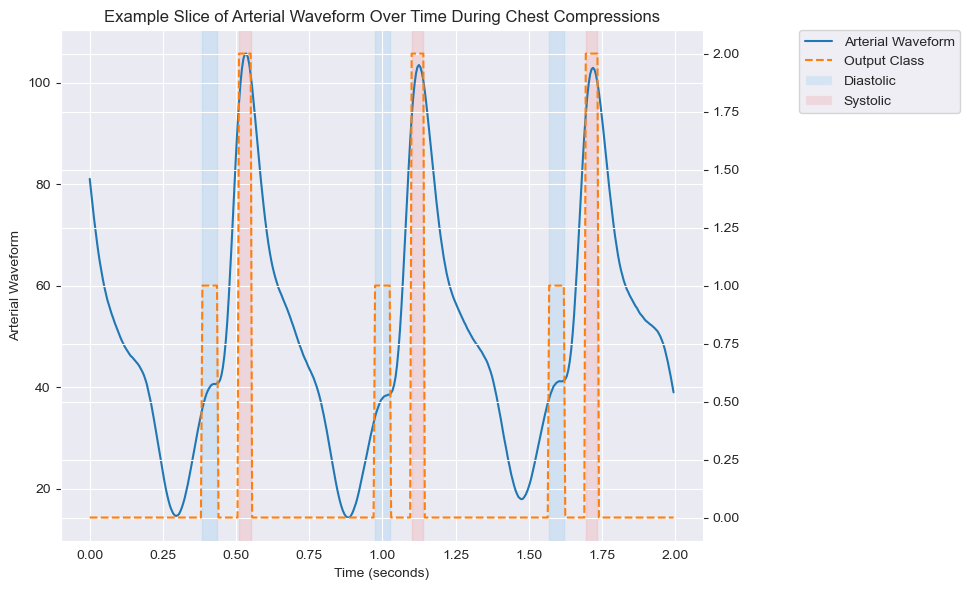

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# ---- Example setup (replace with your actual data) ----
signal_freq = 200  # sampling rate (Hz)
time = np.arange(len(input_data[1, :])) / signal_freq

# ---- Create figure and primary axis ----
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot arterial waveform
sns.lineplot(
    x=time,
    y=input_data[1, :],
    ax=ax1,
    label='Arterial Waveform',
    color='tab:blue'
)

# Secondary y-axis for output class
ax2 = ax1.twinx()
sns.lineplot(
    x=time,
    y=output_data[1, :],
    ax=ax2,
    linestyle='--',
    color='tab:orange',
    # label='Output Class'
)

# ---- Shading function ----
CLASS_LABEL = {1: "Diastolic", 2: "Systolic"}
CLASS_COLOR = {1: "#8EC9F0", 2: "#F29A9A"}  # light blue / light red

def shade_segments(ax, t, y_classes):
    for cid in (1, 2):
        m = (y_classes == cid)
        if not m.any():
            continue
        edges = np.diff(np.r_[False, m, False]).nonzero()[0]
        starts, ends = edges[0::2], edges[1::2]
        for s, e in zip(starts, ends):
            ax.axvspan(t[s], t[e-1], color=CLASS_COLOR[cid], alpha=0.25, zorder=0)

# ---- Call shading AFTER plotting ----
shade_segments(ax1, time, output_data[1, :])

# ---- Custom legend (no duplicates, placed outside) ----
legend_handles = [
    Line2D([], [], color='tab:blue', label='Arterial Waveform'),
    Line2D([], [], color='tab:orange', linestyle='--', label='Output Class'),
    Patch(facecolor=CLASS_COLOR[1], alpha=0.25, label=CLASS_LABEL[1]),
    Patch(facecolor=CLASS_COLOR[2], alpha=0.25, label=CLASS_LABEL[2]),
]

ax1.legend(
    handles=legend_handles,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),   # move further right
    borderaxespad=0.,
    frameon=True
)

# ---- Titles and labels ----
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Arterial Waveform")
# ax2.set_ylabel("Output Class")
ax1.set_title("Example Slice of Arterial Waveform Over Time During Chest Compressions")

# plt.subplots_adjust(right=0.75)  # make space for legend
plt.tight_layout()
plt.show()


Now visualizing for Normal Heartbeat

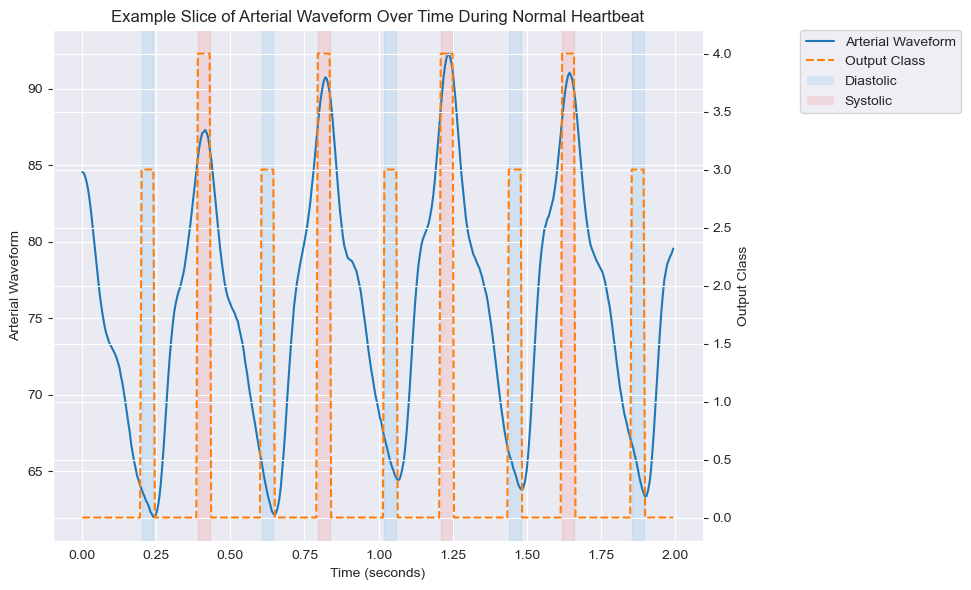

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# ---- Example setup (replace with your actual data) ----
signal_freq = 200  # sampling rate (Hz)
time = np.arange(len(input_data[0, :])) / signal_freq

# ---- Create figure and primary axis ----
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot arterial waveform
sns.lineplot(
    x=time,
    y=input_data[0, :],
    ax=ax1,
    label='Arterial Waveform',
    color='tab:blue'
)

# Secondary y-axis for output class
ax2 = ax1.twinx()
sns.lineplot(
    x=time,
    y=output_data[0, :],
    ax=ax2,
    linestyle='--',
    color='tab:orange',
)

# ---- Shading function ----
CLASS_LABEL = {3: "Diastolic", 4: "Systolic"}
CLASS_COLOR = {3: "#8EC9F0", 4: "#F29A9A"}  # light blue / light red

def shade_segments(ax, t, y_classes):
    for cid in (3, 4):
        m = (y_classes == cid)
        if not m.any():
            continue
        edges = np.diff(np.r_[False, m, False]).nonzero()[0]
        starts, ends = edges[0::2], edges[1::2]
        for s, e in zip(starts, ends):
            ax.axvspan(t[s], t[e-1], color=CLASS_COLOR[cid], alpha=0.25, zorder=0)

# ---- Call shading AFTER plotting ----
shade_segments(ax1, time, output_data[0, :])

# ---- Custom legend (no duplicates, placed outside) ----
legend_handles = [
    Line2D([], [], color='tab:blue', label='Arterial Waveform'),
    Line2D([], [], color='tab:orange', linestyle='--', label='Output Class'),
    Patch(facecolor=CLASS_COLOR[3], alpha=0.25, label=CLASS_LABEL[3]),
    Patch(facecolor=CLASS_COLOR[4], alpha=0.25, label=CLASS_LABEL[4]),
]

ax1.legend(
    handles=legend_handles,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),   # move further right
    borderaxespad=0.,
    frameon=True
)

# ---- Titles and labels ----
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Arterial Waveform")
ax2.set_ylabel("Output Class")
ax1.set_title("Example Slice of Arterial Waveform Over Time During Normal Heartbeat")

# plt.subplots_adjust(right=0.75)  # make space for legend
plt.tight_layout()
plt.show()


Let's first make an LSTM that can estimate among the five output classes

In [27]:
# ----------------------------
# Config
# ----------------------------
WINDOW = 100       # timesteps per window
STRIDE = 1        # slide within each 400-sample patch
N_CLASSES = 5     # {0..4}

# input_data: shape (6800, 400), float
# output_data: shape (6800, 400), ints in {0..4}

# ----------------------------
# Build windows per patch (no cross-boundary windows)
# ----------------------------
Xs, ys = [], []
for x_row, y_row in zip(input_data, output_data.astype(int)):
    # (optional) per-patch normalization
    x = x_row.astype(np.float32)
    x = (x - x.mean()) / (x.std() + 1e-8)

    # make windows inside this 400-sample patch
    idx = np.arange(0, x.shape[0] - WINDOW + 1, STRIDE, dtype=np.int32)
    if idx.size == 0:
        continue
    # windows: (num_win, WINDOW), labels aligned to the last sample of each window
    X_row = np.stack([x[i:i+WINDOW] for i in idx], axis=0)[..., None]  # add feature dim -> (num_win, WINDOW, 1)
    y_row = y_row[idx + WINDOW - 1]

    Xs.append(X_row)
    ys.append(y_row)

X = np.concatenate(Xs, axis=0)
y = np.concatenate(ys, axis=0).astype(np.int64)

print("X shape:", X.shape, "y shape:", y.shape)

X shape: (2046800, 100, 1) y shape: (2046800,)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --- Stratified 80/10/10 split ---
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(sss.split(X, y))

X_train_val, X_test = X[train_val_idx], X[test_idx]
y_train_val, y_test = y[train_val_idx], y[test_idx]

# Split remaining 20% (val) from train_val (80%)
sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.1111, random_state=42)
# 0.1111 of 0.9 ≈ 0.1 → gives 80/10/10 overall
train_idx, val_idx = next(sss_val.split(X_train_val, y_train_val))

X_train, y_train = X_train_val[train_idx], y_train_val[train_idx]
X_val,   y_val   = X_train_val[val_idx],   y_train_val[val_idx]

# --- Convert to torch tensors ---
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.from_numpy(y_train).long()
X_val_t   = torch.from_numpy(X_val).float()
y_val_t   = torch.from_numpy(y_val).long()
X_test_t  = torch.from_numpy(X_test).float()
y_test_t  = torch.from_numpy(y_test).long()

# --- Dataset & DataLoader ---
train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t,   y_val_t)
test_ds  = TensorDataset(X_test_t,  y_test_t)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False, pin_memory=True)

print(f"Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_ds)}")


# --- Model ---
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout1=0.3, dropout2=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout1 if num_layers > 1 else 0.0
        )
        self.dropout1 = nn.Dropout(dropout1)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout2)
        self.fc_out = nn.Linear(64, num_classes)

    def forward(self, x):
        out_seq, (h_n, c_n) = self.lstm(x)
        h_last = h_n[-1]
        x = self.dropout1(h_last)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout2(x)
        return self.fc_out(x)

model = LSTMClassifier(input_size=1, hidden_size=256, num_layers=2, num_classes=N_CLASSES).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- Train / Eval helpers ---
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    tot_loss = tot_correct = tot_samples = 0
    for xb, yb in loader:
        xb = xb.to(device); yb = yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        tot_loss += loss.item() * xb.size(0)
        tot_correct += (logits.argmax(1) == yb).sum().item()
        tot_samples += xb.size(0)
    return tot_loss / tot_samples, tot_correct / tot_samples

def eval_epoch(model, loader, criterion):
    model.eval()
    tot_loss = tot_correct = tot_samples = 0
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device); yb = yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            tot_loss += loss.item() * xb.size(0)
            tot_correct += (logits.argmax(1) == yb).sum().item()
            tot_samples += xb.size(0)
    return tot_loss / tot_samples, tot_correct / tot_samples

# --- Train (train/val) ---
num_epochs = 15
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc     = eval_epoch(model, val_loader, criterion)
    print(f"Epoch {epoch:2d} — train_loss {train_loss:.4f}, acc {train_acc:.4f} | val_loss {val_loss:.4f}, acc {val_acc:.4f}")

# --- Final TEST evaluation (10% held-out) ---
test_loss, test_acc = eval_epoch(model, test_loader, criterion)
print(f"TEST — loss {test_loss:.4f}, acc {test_acc:.4f}")


Now trying with a cascaded LSTM. First LSTM is a binary classifier to decide whether CC or NH

Let's construct the Dataset first

In [41]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import TensorDataset, DataLoader
input_data_binary_stage = input_data[idx_cc+idx_nh,:]
# Create the base array first
base_array = np.concatenate([np.zeros(len(idx_cc)), np.ones(len(idx_nh))])
# Then repeat along axis 1
output_data_binary_stage = np.repeat(base_array.reshape(-1, 1), input_data_binary_stage.shape[1], axis=1)


WINDOW = 100       # timesteps per window
STRIDE = 1        # slide within each 400-sample patch

# input_data: shape (6800, 400), float
# output_data: shape (6800, 400), ints in {0..4}

# ----------------------------
# Build windows per patch (no cross-boundary windows)
# ----------------------------
Xs, ys = [], []
for x_row, y_row in zip(input_data_binary_stage, output_data_binary_stage.astype(int)):
    # (optional) per-patch normalization
    x = x_row.astype(np.float32)
    x = (x - x.mean()) / (x.std() + 1e-8)

    # make windows inside this 400-sample patch
    idx = np.arange(0, x.shape[0] - WINDOW + 1, STRIDE, dtype=np.int32)
    if idx.size == 0:
        continue
    # windows: (num_win, WINDOW), labels aligned to the last sample of each window
    X_row = np.stack([x[i:i+WINDOW] for i in idx], axis=0)[..., None]  # add feature dim -> (num_win, WINDOW, 1)
    y_row = y_row[idx + WINDOW - 1]

    Xs.append(X_row)
    ys.append(y_row)

X_bin = np.concatenate(Xs, axis=0)
y_bin = np.concatenate(ys, axis=0).astype(np.int64)

print("X shape:", X_bin.shape, "y shape:", y_bin.shape)


X shape: (1957403, 100, 1) y shape: (1957403,)


In [43]:
# ----------------------------
# 1) Stratified 80/10/10 split
# ----------------------------
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(sss1.split(X_bin, y_bin))
X_train_val, X_test = X_bin[train_val_idx], X_bin[test_idx]
y_train_val, y_test = y_bin[train_val_idx], y_bin[test_idx]

# Now split 10% val out of remaining 80% → 80/10/10 overall
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.1111, random_state=42)
train_idx, val_idx = next(sss2.split(X_train_val, y_train_val))
X_train, y_train = X_train_val[train_idx], y_train_val[train_idx]
X_val,   y_val   = X_train_val[val_idx],  y_train_val[val_idx]

print(f"Splits — train:{len(X_train)} val:{len(X_val)} test:{len(X_test)}")

# ----------------------------
# 2) Torch tensors & loaders (batched)
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.from_numpy(y_train).long()
X_val_t   = torch.from_numpy(X_val).float()
y_val_t   = torch.from_numpy(y_val).long()
X_test_t  = torch.from_numpy(X_test).float()
y_test_t  = torch.from_numpy(y_test).long()

train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t,   y_val_t)
test_ds  = TensorDataset(X_test_t,  y_test_t)

BATCH = 4096  # feel free to raise this on your 5090 until near OOM
train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True,  pin_memory=True, num_workers=8)
val_loader   = DataLoader(val_ds,   batch_size=BATCH, shuffle=False, pin_memory=True, num_workers=8)
test_loader  = DataLoader(test_ds,  batch_size=BATCH, shuffle=False, pin_memory=True, num_workers=8)

# ----------------------------
# 3) Binary LSTM model (2 logits → CE loss with labels 0/1)
# ----------------------------
class BinaryLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=1, dropout1=0.3, dropout2=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout1 if num_layers > 1 else 0.0
        )
        self.dropout1 = nn.Dropout(dropout1)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout2)
        self.fc_out = nn.Linear(64, 2)  # two logits for CE

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        x = self.dropout1(h_n[-1])
        x = self.relu(self.fc1(x))
        x = self.dropout2(x)
        return self.fc_out(x)

model = BinaryLSTM(input_size=1, hidden_size=128, num_layers=2).to(device)
criterion = nn.CrossEntropyLoss()

# Optional: handle imbalance with class weights
# w0, w1 = (len(y_train) / (2*np.bincount(y_train)))
# criterion = nn.CrossEntropyLoss(weight=torch.tensor([w0, w1], dtype=torch.float32, device=device))

optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ----------------------------
# 4) Train / eval + EARLY STOPPING on val loss
# ----------------------------
@torch.no_grad()
def eval_epoch(model, loader):
    model.eval()
    tot_loss=tot_correct=tot=0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        logits = model(xb)
        loss = criterion(logits, yb)
        tot_loss += loss.item() * xb.size(0)
        tot_correct += (logits.argmax(1) == yb).sum().item()
        tot += xb.size(0)
    return tot_loss/tot, tot_correct/tot

def train_epoch(model, loader):
    model.train()
    tot_loss=tot_correct=tot=0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        tot_loss += loss.item() * xb.size(0)
        tot_correct += (logits.argmax(1) == yb).sum().item()
        tot += xb.size(0)
    return tot_loss/tot, tot_correct/tot

num_epochs = 100
patience   = 5
min_delta  = 1e-4
best_val   = float('inf')
no_imp     = 0
best_state = None

for ep in range(1, num_epochs+1):
    tr_loss, tr_acc = train_epoch(model, train_loader)
    va_loss, va_acc = eval_epoch(model, val_loader)
    print(f"Epoch {ep:02d} | train {tr_loss:.4f}/{tr_acc:.4f} | val {va_loss:.4f}/{va_acc:.4f}")
    if va_loss + min_delta < best_val:
        best_val = va_loss; no_imp = 0
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
    else:
        no_imp += 1
        if no_imp >= patience:
            print(f"Early stopping at epoch {ep}. Best val_loss={best_val:.4f}")
            break

if best_state:
    model.load_state_dict(best_state)
    model.to(device)
    print("Restored best model weights.")

# ----------------------------
# 5) Final test
# ----------------------------
test_loss, test_acc = eval_epoch(model, test_loader)
print(f"TEST — loss {test_loss:.4f}, acc {test_acc:.4f}")

# ----------------------------
# 6) Inference helper (probability of class=1)
# ----------------------------
import torch.nn.functional as F

@torch.no_grad()
def predict_proba_binary(X_np):
    model.eval()
    Xt = torch.from_numpy(X_np).float().to(device)
    logits = model(Xt)
    probs = F.softmax(logits, dim=1)[:, 1]
    return probs.detach().cpu().numpy()

Splits — train:1391948 val:173974 test:391481
Using device: cuda
Epoch 01 | train 0.5990/0.6833 | val 0.4759/0.7871
Epoch 02 | train 0.3688/0.8293 | val 0.1553/0.9411
Epoch 03 | train 0.1161/0.9588 | val 0.0829/0.9706
Epoch 04 | train 0.0688/0.9763 | val 0.0544/0.9808
Epoch 05 | train 0.0485/0.9838 | val 0.0376/0.9874
Epoch 06 | train 0.0388/0.9871 | val 0.0311/0.9894
Epoch 07 | train 0.0329/0.9891 | val 0.0292/0.9901
Epoch 08 | train 0.0271/0.9909 | val 0.0233/0.9918
Epoch 09 | train 0.0234/0.9920 | val 0.0219/0.9926
Epoch 10 | train 0.0203/0.9931 | val 0.0165/0.9943
Epoch 11 | train 0.0191/0.9934 | val 0.0142/0.9951
Epoch 12 | train 0.0161/0.9945 | val 0.0134/0.9954
Epoch 13 | train 0.0143/0.9951 | val 0.0149/0.9950
Epoch 14 | train 0.0132/0.9954 | val 0.0105/0.9961
Epoch 15 | train 0.0122/0.9958 | val 0.0103/0.9962
Epoch 16 | train 0.0113/0.9960 | val 0.0096/0.9963
Epoch 17 | train 0.0100/0.9964 | val 0.0085/0.9968
Epoch 18 | train 0.0095/0.9966 | val 0.0078/0.9971
Epoch 19 | train 

Now let's train the 3 way classifier i.e. nothing, diastolic, systolic, corresponding to chest compression LSTM in the 2nd stage.

In [47]:
from mylstm_fun import build_lstm_windows
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


WINDOW= 100
# input_data: (6800, 400), output_data: (6800, 400)
X, y = build_lstm_windows(input_data[idx_cc], output_data[idx_cc], window=WINDOW, stride=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --- Stratified 80/10/10 split ---
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(sss.split(X, y))

X_train_val, X_test = X[train_val_idx], X[test_idx]
y_train_val, y_test = y[train_val_idx], y[test_idx]

# Split remaining 20% (val) from train_val (80%)
sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.1111, random_state=42)
# 0.1111 of 0.9 ≈ 0.1 → gives 80/10/10 overall
train_idx, val_idx = next(sss_val.split(X_train_val, y_train_val))

X_train, y_train = X_train_val[train_idx], y_train_val[train_idx]
X_val,   y_val   = X_train_val[val_idx],   y_train_val[val_idx]

# --- Convert to torch tensors ---
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.from_numpy(y_train).long()
X_val_t   = torch.from_numpy(X_val).float()
y_val_t   = torch.from_numpy(y_val).long()
X_test_t  = torch.from_numpy(X_test).float()
y_test_t  = torch.from_numpy(y_test).long()

# --- Dataset & DataLoader ---
train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t,   y_val_t)
test_ds  = TensorDataset(X_test_t,  y_test_t)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False, pin_memory=True)

print(f"Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_ds)}")


# --- Model ---
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout1=0.3, dropout2=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout1 if num_layers > 1 else 0.0
        )
        self.dropout1 = nn.Dropout(dropout1)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout2)
        self.fc_out = nn.Linear(64, num_classes)

    def forward(self, x):
        out_seq, (h_n, c_n) = self.lstm(x)
        h_last = h_n[-1]
        x = self.dropout1(h_last)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout2(x)
        return self.fc_out(x)

model = LSTMClassifier(input_size=1, hidden_size=256, num_layers=2, num_classes=len(np.unique(y))).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- Train / Eval helpers ---
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    tot_loss = tot_correct = tot_samples = 0
    for xb, yb in loader:
        xb = xb.to(device); yb = yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        tot_loss += loss.item() * xb.size(0)
        tot_correct += (logits.argmax(1) == yb).sum().item()
        tot_samples += xb.size(0)
    return tot_loss / tot_samples, tot_correct / tot_samples

def eval_epoch(model, loader, criterion):
    model.eval()
    tot_loss = tot_correct = tot_samples = 0
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device); yb = yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            tot_loss += loss.item() * xb.size(0)
            tot_correct += (logits.argmax(1) == yb).sum().item()
            tot_samples += xb.size(0)
    return tot_loss / tot_samples, tot_correct / tot_samples

# --- Train (train/val) with EARLY STOPPING on val loss ---
num_epochs = 50
patience   = 5          # stop if no val-loss improvement for this many epochs
min_delta  = 1e-4       # minimal improvement to count as "better"

best_val_loss = float("inf")
epochs_no_improve = 0
best_state = None

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc     = eval_epoch(model, val_loader, criterion)

    print(f"Epoch {epoch:2d} — train_loss {train_loss:.4f}, acc {train_acc:.4f} | "
          f"val_loss {val_loss:.4f}, acc {val_acc:.4f}")

    # improvement if val_loss goes down by more than min_delta
    if val_loss + min_delta < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        # keep a CPU copy of the best weights
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch}. Best val_loss = {best_val_loss:.4f}")
            break

# restore best weights (if we found any improvement)
if best_state is not None:
    model.load_state_dict(best_state)
    model.to(device)
    print("Restored best model weights.")

# --- Final TEST evaluation (10% held-out) ---
test_loss, test_acc = eval_epoch(model, test_loader, criterion)
print(f"TEST — loss {test_loss:.4f}, acc {test_acc:.4f}")

✅ Built LSTM windows: X (654675, 100, 1), y (654675,)
Using device: cuda
Train: 465552 | Val: 58188 | Test: 130935
Epoch  1 — train_loss 0.2196, acc 0.9148 | val_loss 0.1631, acc 0.9342
Epoch  2 — train_loss 0.1350, acc 0.9456 | val_loss 0.1153, acc 0.9524
Epoch  3 — train_loss 0.1145, acc 0.9544 | val_loss 0.0994, acc 0.9607
Epoch  4 — train_loss 0.1059, acc 0.9580 | val_loss 0.0985, acc 0.9595
Epoch  5 — train_loss 0.0988, acc 0.9611 | val_loss 0.0940, acc 0.9627
Epoch  6 — train_loss 0.0953, acc 0.9624 | val_loss 0.0916, acc 0.9627
Epoch  7 — train_loss 0.0905, acc 0.9644 | val_loss 0.0833, acc 0.9667
Epoch  8 — train_loss 0.0866, acc 0.9655 | val_loss 0.0905, acc 0.9631
Epoch  9 — train_loss 0.0833, acc 0.9669 | val_loss 0.0849, acc 0.9659
Epoch 10 — train_loss 0.0803, acc 0.9679 | val_loss 0.0789, acc 0.9679
Epoch 11 — train_loss 0.0777, acc 0.9690 | val_loss 0.0789, acc 0.9683
Epoch 12 — train_loss 0.0754, acc 0.9697 | val_loss 0.0757, acc 0.9694
Epoch 13 — train_loss 0.0740, acc

In [ ]:
import numpy as np

# y: original labels per window
# 0=nothing, 1=CC, 2=NH
def make_labels_stage1(y):
    # functional (1) if systolic or diastolic; else 0
    return np.where((y == 1) | (y == 2), 1, 0).astype(np.int64)

def make_labels_stage2(y):
    # keep only functional windows; map {1,2,0(nothing)} -> {0,1,2}
    # here we keep the same mapping (0=nothing,1=systolic,2=diastolic)
    # stage2 will *only* see samples where stage1 label==1
    return y.astype(np.int64)


Now estimating the peak-to-peak i.e. Systolic to diastolic period for Chest Compressions aggregated across all segments

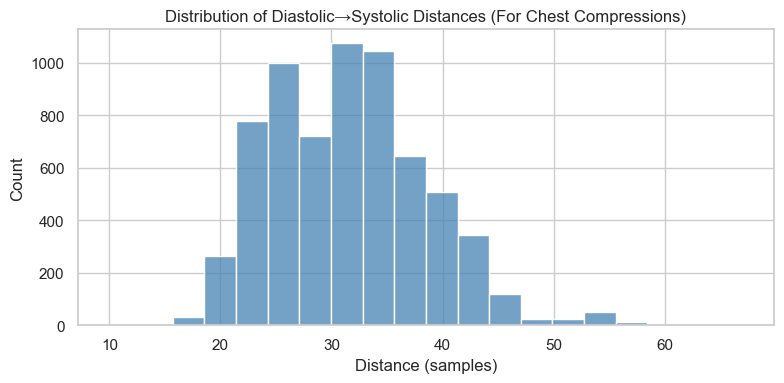

In [16]:
import numpy as np

Fs = 200.0  # Hz
output_data_cc = output_data[idx_cc, :].astype(int)

all_samples = []
all_seconds = []

for y in output_data_cc:
    d_starts = np.flatnonzero(np.diff((y == 1).astype(np.int8), prepend=0) == 1)
    s_starts = np.flatnonzero(np.diff((y == 2).astype(np.int8), prepend=0) == 1)
    j = np.searchsorted(s_starts, d_starts, side='right')
    valid = j < s_starts.size
    per_cycle_samples = s_starts[j[valid]] - d_starts[valid]
    all_samples.extend(per_cycle_samples)
    all_seconds.extend(per_cycle_samples / Fs)

per_cycle_samples = np.array(all_samples)
per_cycle_seconds = np.array(all_seconds)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.histplot(per_cycle_samples, bins=20, kde=False, color="steelblue")
plt.title("Distribution of Diastolic→Systolic Distances (For Chest Compressions)")
plt.xlabel("Distance (samples)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Similarly for normal heartbeat

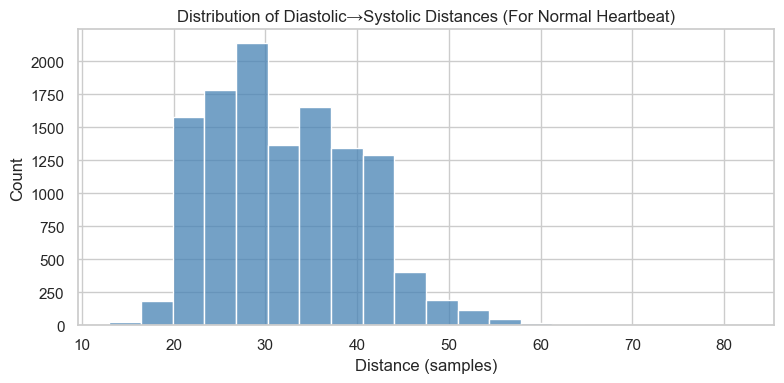

In [17]:
import numpy as np

Fs = 200.0  # Hz
output_data_nh = output_data[idx_nh, :].astype(int)

all_samples = []
all_seconds = []

for y in output_data_nh:
    d_starts = np.flatnonzero(np.diff((y == 3).astype(np.int8), prepend=0) == 1)
    s_starts = np.flatnonzero(np.diff((y == 4).astype(np.int8), prepend=0) == 1)
    j = np.searchsorted(s_starts, d_starts, side='right')
    valid = j < s_starts.size
    per_cycle_samples = s_starts[j[valid]] - d_starts[valid]
    all_samples.extend(per_cycle_samples)
    all_seconds.extend(per_cycle_samples / Fs)

per_cycle_samples = np.array(all_samples)
per_cycle_seconds = np.array(all_seconds)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.histplot(per_cycle_samples, bins=20, kde=False, color="steelblue")
plt.title("Distribution of Diastolic→Systolic Distances (For Normal Heartbeat)")
plt.xlabel("Distance (samples)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()